In [ ]:
print("hello world")

In [2]:
import torch

torch.__version__

'2.2.1+cpu'

## Torch Tensor
* dim: dimension
* ndim: number of dimension
* 

In [3]:
t = torch.Tensor([[1,2,3,4,5,6,7,8,9],
                  [11,12,13,14,15,16,17,18,19]])
type(t), t.ndim, t.shape, t.size() # return representation of shape of a tensor

(torch.Tensor, 2, torch.Size([2, 9]), torch.Size([2, 9]))

In [4]:
a = t.numpy()
type(a), a.ndim, a.shape, a.size

(numpy.ndarray, 2, (2, 9), 18)

In [5]:
t1 = torch.tensor(a)
type(t1), t1.ndim, t1.shape, t1.size

(torch.Tensor, 2, torch.Size([2, 9]), <function Tensor.size>)

In [6]:
# Use a Tensor instance to represent a gray image
# the number is between [0-255] to represent the grey degree
image = torch.Tensor(((12,124),(34,255), (67,110)))
type(image), image.shape

(torch.Tensor, torch.Size([3, 2]))

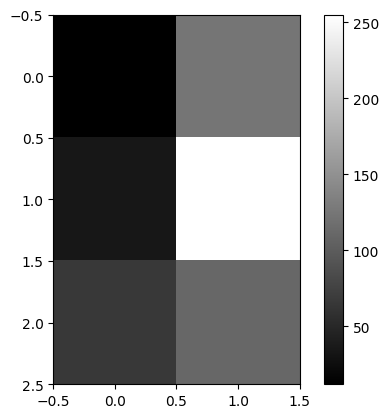

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap = 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

## Use functions empty(), ones(), zeros()

In [15]:
t = torch.empty(10,2)
t, type(t), t.ndim, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Tensor,
 2,
 torch.Size([10, 2]))

In [9]:
t = torch.ones(10)
t, type(t), t.ndim, t.shape

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 torch.Tensor,
 1,
 torch.Size([10]))

In [13]:
t = torch.zeros(10)
t, type(t), t.ndim, t.shape

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 torch.Tensor,
 1,
 torch.Size([10]))

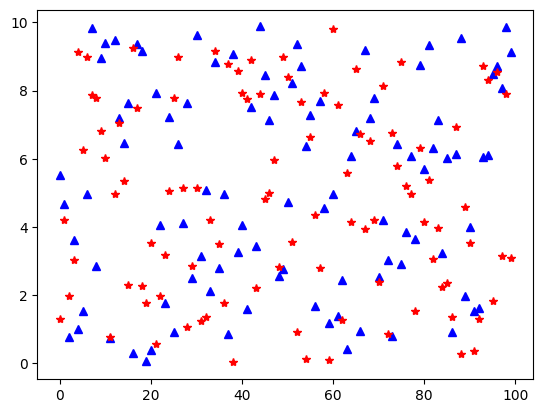

In [10]:
x = torch.empty(size=(2,100)).uniform_(0,10)
plt.plot(x.numpy()[0], 'b^')
plt.plot(x.numpy()[1], 'r*')
plt.show()

In [16]:
t, t.shape

(tensor([[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]),
 torch.Size([10, 2]))

In [17]:
t1 = t.reshape(2,10)
t1

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Tensor Operation
1. +, -, *, /
2. sum(), sin(), cos()

In [21]:
x = torch.sum(t)
x1 = torch.numel(t)
x,x1

(tensor(0.), 20)